# Create linked attributes

## Mortality labels

### Read files

In [1]:
import pandas as pd

pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

In [7]:
import os
import pandas as pd


admissionsDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240531/etc/2023-11-10-blood-admissions.csv')
journeyEpisodeDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240531/etc/SuperBugSuperEpisode-72hr-2024-03-27.csv')
mappingDf = pd.read_csv(os.environ['GENOMICS_DATA_BASE'] + '/patient_tube_id_mapping_full.tsv', sep='\t')

admissionsDf.shape, journeyEpisodeDf.shape, mappingDf.shape

/tmp/ipykernel_70273/445475224.py:6: DtypeWarning: Columns (10,17,26,31,37,44) have mixed types. Specify dtype option on import or set low_memory=False.
  journeyEpisodeDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240531/etc/SuperBugSuperEpisode-72hr-2024-03-27.csv')


((436214, 20), (95491, 46), (3117, 18))

### Merge

In [44]:
mergedDf = mappingDf[['tube_code', 'PATIENT_ID', 'date_of_collection']].merge(
    admissionsDf[['PATIENT_ID', 'start_date', 'end_date', 'DATEOFDEATH_DATETIME']],
    how='inner',
    on=['PATIENT_ID']
)
mergedDf['DATEOFDEATH_DATETIME'] = pd.to_datetime(mergedDf['DATEOFDEATH_DATETIME'], format='%Y-%m-%d %H:%M:%S.%f')
mergedDf['start_date'] = pd.to_datetime(mergedDf['start_date'], format='%Y-%m-%d %H:%M:%S.%f')
mergedDf['end_date'] = pd.to_datetime(mergedDf['end_date'], format='%Y-%m-%d %H:%M:%S.%f')
mergedDf['date_of_collection'] = pd.to_datetime(mergedDf['date_of_collection'], format='%Y-%m-%d')
mergedDf

,tube_code,PATIENT_ID,date_of_collection,start_date,end_date,DATEOFDEATH_DATETIME
0,AH19B003,526238.0,2019-02-03,2021-01-05 09:48:01,2021-01-05 23:59:59,2020-12-31 06:30:00
1,AH19B003,526238.0,2019-02-03,2021-01-05 09:48:01,2021-01-05 23:59:59,2020-12-31 06:30:00
2,AH19B003,526238.0,2019-02-03,2020-12-23 15:11:00,2020-12-31 16:30:00,2020-12-31 06:30:00
3,AH19B003,526238.0,2019-02-03,2020-12-23 15:11:00,2020-12-31 16:30:00,2020-12-31 06:30:00
4,AH19B003,526238.0,2019-02-03,2020-12-23 03:06:44,2020-12-23 15:11:00,2020-12-31 06:30:00
...,...,...,...,...,...,...
522087,ALF23B102,2015952.0,2023-02-15,2023-01-18 10:36:53,2023-01-18 23:59:59,2023-02-16 18:45:00
522088,ALF23B102,2015952.0,2023-02-15,2023-01-09 13:41:54,2023-01-09 13:41:54,2023-02-16 18:45:00
522089,ALF23B102,2015952.0,2023-02-15,2023-01-08 14:05:00,2023-02-16 23:22:00,2023-02-16 18:45:00
522090,ALF23B102,2015952.0,2023-02-15,2023-02-23 08:52:54,2023-02-23 23:59:59,2023-02-16 18:45:00


In [45]:
mergedDf['death_7_day'] = ((mergedDf['DATEOFDEATH_DATETIME'] < (mergedDf['start_date'] + pd.DateOffset(days=2))) & (mergedDf['DATEOFDEATH_DATETIME'] < (mergedDf['date_of_collection'] + pd.DateOffset(days=14))) & (mergedDf['DATEOFDEATH_DATETIME'] < (mergedDf['start_date'] + pd.DateOffset(days=7))) & ~mergedDf['DATEOFDEATH_DATETIME'].isna()).apply(lambda x: 1 if x else 0)
mergedDf['death_14_day'] = ((mergedDf['DATEOFDEATH_DATETIME'] < (mergedDf['start_date'] + pd.DateOffset(days=2))) & (mergedDf['DATEOFDEATH_DATETIME'] < (mergedDf['date_of_collection'] + pd.DateOffset(days=21))) & (mergedDf['DATEOFDEATH_DATETIME'] < (mergedDf['start_date'] + pd.DateOffset(days=14))) & ~mergedDf['DATEOFDEATH_DATETIME'].isna()).apply(lambda x: 1 if x else 0)
mergedDf['death_30_day'] = ((mergedDf['DATEOFDEATH_DATETIME'] < (mergedDf['start_date'] + pd.DateOffset(days=2))) & (mergedDf['DATEOFDEATH_DATETIME'] < (mergedDf['date_of_collection'] + pd.DateOffset(days=37))) & (mergedDf['DATEOFDEATH_DATETIME'] < (mergedDf['start_date'] + pd.DateOffset(days=30))) & ~mergedDf['DATEOFDEATH_DATETIME'].isna()).apply(lambda x: 1 if x else 0)
mergedDf

,tube_code,PATIENT_ID,date_of_collection,start_date,end_date,DATEOFDEATH_DATETIME,death_7_day,death_14_day,death_30_day
0,AH19B003,526238.0,2019-02-03,2021-01-05 09:48:01,2021-01-05 23:59:59,2020-12-31 06:30:00,0,0,0
1,AH19B003,526238.0,2019-02-03,2021-01-05 09:48:01,2021-01-05 23:59:59,2020-12-31 06:30:00,0,0,0
2,AH19B003,526238.0,2019-02-03,2020-12-23 15:11:00,2020-12-31 16:30:00,2020-12-31 06:30:00,0,0,0
3,AH19B003,526238.0,2019-02-03,2020-12-23 15:11:00,2020-12-31 16:30:00,2020-12-31 06:30:00,0,0,0
4,AH19B003,526238.0,2019-02-03,2020-12-23 03:06:44,2020-12-23 15:11:00,2020-12-31 06:30:00,0,0,0
...,...,...,...,...,...,...,...,...,...
522087,ALF23B102,2015952.0,2023-02-15,2023-01-18 10:36:53,2023-01-18 23:59:59,2023-02-16 18:45:00,0,0,0
522088,ALF23B102,2015952.0,2023-02-15,2023-01-09 13:41:54,2023-01-09 13:41:54,2023-02-16 18:45:00,0,0,0
522089,ALF23B102,2015952.0,2023-02-15,2023-01-08 14:05:00,2023-02-16 23:22:00,2023-02-16 18:45:00,0,0,0
522090,ALF23B102,2015952.0,2023-02-15,2023-02-23 08:52:54,2023-02-23 23:59:59,2023-02-16 18:45:00,1,1,1


In [46]:
mergedDf = mergedDf.groupby(by=['PATIENT_ID', 'tube_code']).agg({'death_7_day': 'any', 'death_14_day': 'any', 'death_30_day': 'any'}).reset_index()
mergedDf.death_7_day = mergedDf.death_7_day.apply(lambda x: 1 if x else 0)
mergedDf.death_14_day = mergedDf.death_14_day.apply(lambda x: 1 if x else 0)
mergedDf.death_30_day = mergedDf.death_30_day.apply(lambda x: 1 if x else 0)
mergedDf

,PATIENT_ID,tube_code,death_7_day,death_14_day,death_30_day
0,18849.0,AH19I003,0,0,0
1,41308.0,AH21E085,0,0,0
2,49412.0,ALF22B136,0,0,0
3,50056.0,AH20B011,0,0,0
4,51211.0,ALF23D002,0,0,0
...,...,...,...,...,...
3079,2680034.0,ALF23C129,1,1,1
3080,2680486.0,ALF23C135,0,0,0
3081,2681377.0,ALF23C174,0,0,0
3082,2682433.0,ALF23C184,0,0,0


In [47]:
mergedDf.death_7_day.value_counts()

death_7_day
0    2795
1     289
Name: count, dtype: int64

In [48]:
mergedDf.death_14_day.value_counts()

death_14_day
0    2745
1     339
Name: count, dtype: int64

In [49]:
mergedDf.death_30_day.value_counts()

death_30_day
0    2675
1     409
Name: count, dtype: int64

In [51]:
len(mergedDf.tube_code.unique())

3084

### Save to a csv file

In [52]:
import os
from pathlib import Path


mergedDf.to_csv(Path(os.environ['EHR_DATA_BASE'], 'data', 'full_cohort', 'tube_id_mortality_labels.csv'), index=False)

## Temporal information

### Read files

In [32]:
import os
from pathlib import Path

import pandas as pd


mappingDf = pd.read_csv(Path(os.environ['GENOMICS_DATA_BASE'], 'patient_tube_id_mapping_full.tsv'), sep='\t')

mappingDf['date_of_collection'] = pd.to_datetime(mappingDf['date_of_collection'], format='%Y-%m-%d')

mappingDf.shape

(3117, 18)

In [33]:
min(mappingDf.date_of_collection), max(mappingDf.date_of_collection)

(Timestamp('2018-10-01 00:00:00'), Timestamp('2023-04-01 00:00:00'))

In [28]:
mappingDf['date_of_collection'] = (mappingDf.date_of_collection - min(mappingDf.date_of_collection)).dt.days

<Axes: >

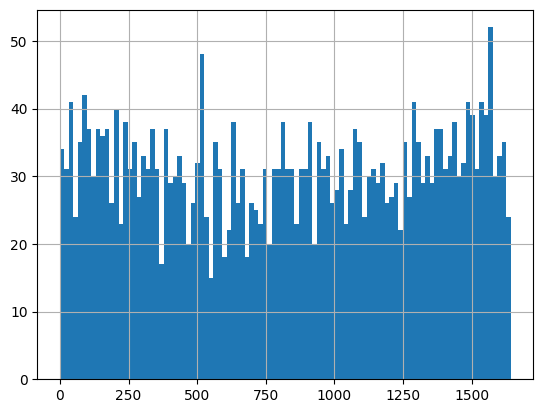

In [30]:
mappingDf.date_of_collection.hist(bins=100)

In [29]:
mappingDf[['tube_code', 'date_of_collection']]

,tube_code,date_of_collection
0,AH19J072,394
1,AH19J074,394
2,AH19B003,125
3,AH20A024,472
4,AH20L041,807
...,...,...
3112,ALF22L076,1536
3113,ALF22L089,1538
3114,ALF22L138,1548
3115,ALF23A102,1563


### Save to a csv file

In [31]:
import os
from pathlib import Path


mappingDf[['tube_code', 'date_of_collection']].to_csv(Path(os.environ['EHR_DATA_BASE'], 'data', 'full_cohort', 'tube_id_collection_date.csv'), index=False)

## Location information

In [12]:
import os
from pathlib import Path

import pandas as pd


mappingDf = pd.read_csv(Path(os.environ['GENOMICS_DATA_BASE'], 'patient_tube_id_mapping_full.tsv'), sep='\t')

mappingDf

,tube_code,PATIENT_ID,db_ID,pt_age,pt_gender,EPISODE_ID,hospital_admission,hospital_discharge,hospital_in_last_year,genome_species,species_reported,contig_number,length,tube_code_duplicate_or_old,date_of_collection,ID_number,location_additional_02,collected_from_original
0,AH19J072,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Escherichia coli,Escherichia coli,92,5131021,NaN,2019-10-30,19-303-0997,A-7EA;HAEM,Blood
1,AH19J074,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Streptococcus sp. D19,Streptococcus mitis group,84,2022991,NaN,2019-10-30,19-303-1174,A-7EA;HAEM,Blood Peripheral
2,AH19B003,526238.0,567AE,85,Male,640261.0,2019-02-04,2019-02-07,no,Escherichia coli,Escherichia coli,93,4942915,NaN,2019-02-03,19-034-1596,A-4WB;GMC,Blood
3,AH20A024,788941.0,3YBDS,58,Female,13194824.0,2020-01-16,2020-01-19,no,Escherichia coli,Escherichia coli,110,5149157,NaN,2020-01-16,20-016-2112,S-ED;Emergency,Blood Venous
4,AH20L041,1023735.0,2VJ78,42,Male,14210147.0,2020-12-18,2021-01-05,yes,Staphylococcus aureus,Staphylococcus aureus,46,2735216,NaN,2020-12-16,20-351-2856,Emergency Dept;nan,Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,ALF22L076,639020.0,3S6HL,84,Male,17219899.0,2022-12-15,2022-12-20,yes,Streptococcus vestibularis,Streptococcus salivarius group,107,1938627,NaN,2022-12-15,22-349-2150,Ward 4WB,Blood Peripheral
3113,ALF22L089,655404.0,6EWBM,67,Female,NaN,NaN,NaN,NaN,Proteus columbae,Proteus vulgaris,152,3972219,NaN,2022-12-17,22-351-1465,Comm/Amb Clinic,Blood
3114,ALF22L138,2572048.0,YM5PJ,61,Male,NaN,NaN,NaN,NaN,Enterobacter roggenkampii,Enterobacter cloacae complex,66,4876179,NaN,2022-12-27,22-361-0202,Ward 7 East,Hick White Lum
3115,ALF23A102,2054964.0,5DYAH,35,Female,17294287.0,2023-01-12,2023-02-01,yes,Streptococcus constellatus,Streptococcus anginosus group,54,1869828,NaN,2023-01-11,23-011-3305,ICU,Blood Venous


In [13]:
mappingDf['location'] = mappingDf.location_additional_02.apply(lambda x: x if((isinstance(x, str)) and (len(x.split(';')) > 1) and (x.split(';')[1] != 'nan')) else ((x.split(';')[0]) if(isinstance(x, str)) else None))
mappingDf['location'] = mappingDf.location.apply(lambda x: None if (isinstance(x, str) and ('nan' in x)) else x)
mappingDf

,tube_code,PATIENT_ID,db_ID,pt_age,pt_gender,EPISODE_ID,hospital_admission,hospital_discharge,hospital_in_last_year,genome_species,species_reported,contig_number,length,tube_code_duplicate_or_old,date_of_collection,ID_number,location_additional_02,collected_from_original,location
0,AH19J072,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Escherichia coli,Escherichia coli,92,5131021,NaN,2019-10-30,19-303-0997,A-7EA;HAEM,Blood,A-7EA;HAEM
1,AH19J074,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Streptococcus sp. D19,Streptococcus mitis group,84,2022991,NaN,2019-10-30,19-303-1174,A-7EA;HAEM,Blood Peripheral,A-7EA;HAEM
2,AH19B003,526238.0,567AE,85,Male,640261.0,2019-02-04,2019-02-07,no,Escherichia coli,Escherichia coli,93,4942915,NaN,2019-02-03,19-034-1596,A-4WB;GMC,Blood,A-4WB;GMC
3,AH20A024,788941.0,3YBDS,58,Female,13194824.0,2020-01-16,2020-01-19,no,Escherichia coli,Escherichia coli,110,5149157,NaN,2020-01-16,20-016-2112,S-ED;Emergency,Blood Venous,S-ED;Emergency
4,AH20L041,1023735.0,2VJ78,42,Male,14210147.0,2020-12-18,2021-01-05,yes,Staphylococcus aureus,Staphylococcus aureus,46,2735216,NaN,2020-12-16,20-351-2856,Emergency Dept;nan,Blood,Emergency Dept
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,ALF22L076,639020.0,3S6HL,84,Male,17219899.0,2022-12-15,2022-12-20,yes,Streptococcus vestibularis,Streptococcus salivarius group,107,1938627,NaN,2022-12-15,22-349-2150,Ward 4WB,Blood Peripheral,Ward 4WB
3113,ALF22L089,655404.0,6EWBM,67,Female,NaN,NaN,NaN,NaN,Proteus columbae,Proteus vulgaris,152,3972219,NaN,2022-12-17,22-351-1465,Comm/Amb Clinic,Blood,Comm/Amb Clinic
3114,ALF22L138,2572048.0,YM5PJ,61,Male,NaN,NaN,NaN,NaN,Enterobacter roggenkampii,Enterobacter cloacae complex,66,4876179,NaN,2022-12-27,22-361-0202,Ward 7 East,Hick White Lum,Ward 7 East
3115,ALF23A102,2054964.0,5DYAH,35,Female,17294287.0,2023-01-12,2023-02-01,yes,Streptococcus constellatus,Streptococcus anginosus group,54,1869828,NaN,2023-01-11,23-011-3305,ICU,Blood Venous,ICU


In [14]:
top_locations = mappingDf['location'].value_counts().nlargest(30).index
mappingDf['location'] = mappingDf['location'].where(mappingDf['location'].isin(top_locations), None)
mappingDf

,tube_code,PATIENT_ID,db_ID,pt_age,pt_gender,EPISODE_ID,hospital_admission,hospital_discharge,hospital_in_last_year,genome_species,species_reported,contig_number,length,tube_code_duplicate_or_old,date_of_collection,ID_number,location_additional_02,collected_from_original,location
0,AH19J072,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Escherichia coli,Escherichia coli,92,5131021,NaN,2019-10-30,19-303-0997,A-7EA;HAEM,Blood,A-7EA;HAEM
1,AH19J074,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Streptococcus sp. D19,Streptococcus mitis group,84,2022991,NaN,2019-10-30,19-303-1174,A-7EA;HAEM,Blood Peripheral,A-7EA;HAEM
2,AH19B003,526238.0,567AE,85,Male,640261.0,2019-02-04,2019-02-07,no,Escherichia coli,Escherichia coli,93,4942915,NaN,2019-02-03,19-034-1596,A-4WB;GMC,Blood,None
3,AH20A024,788941.0,3YBDS,58,Female,13194824.0,2020-01-16,2020-01-19,no,Escherichia coli,Escherichia coli,110,5149157,NaN,2020-01-16,20-016-2112,S-ED;Emergency,Blood Venous,None
4,AH20L041,1023735.0,2VJ78,42,Male,14210147.0,2020-12-18,2021-01-05,yes,Staphylococcus aureus,Staphylococcus aureus,46,2735216,NaN,2020-12-16,20-351-2856,Emergency Dept;nan,Blood,Emergency Dept
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,ALF22L076,639020.0,3S6HL,84,Male,17219899.0,2022-12-15,2022-12-20,yes,Streptococcus vestibularis,Streptococcus salivarius group,107,1938627,NaN,2022-12-15,22-349-2150,Ward 4WB,Blood Peripheral,Ward 4WB
3113,ALF22L089,655404.0,6EWBM,67,Female,NaN,NaN,NaN,NaN,Proteus columbae,Proteus vulgaris,152,3972219,NaN,2022-12-17,22-351-1465,Comm/Amb Clinic,Blood,Comm/Amb Clinic
3114,ALF22L138,2572048.0,YM5PJ,61,Male,NaN,NaN,NaN,NaN,Enterobacter roggenkampii,Enterobacter cloacae complex,66,4876179,NaN,2022-12-27,22-361-0202,Ward 7 East,Hick White Lum,Ward 7 East
3115,ALF23A102,2054964.0,5DYAH,35,Female,17294287.0,2023-01-12,2023-02-01,yes,Streptococcus constellatus,Streptococcus anginosus group,54,1869828,NaN,2023-01-11,23-011-3305,ICU,Blood Venous,ICU


In [15]:
mappingDf = mappingDf[['tube_code', 'location']]
mappingDf = mappingDf.dropna(axis=0)
mappingDf

,tube_code,location
0,AH19J072,A-7EA;HAEM
1,AH19J074,A-7EA;HAEM
4,AH20L041,Emergency Dept
11,AH20J071,ICU
12,AH21C033,Ward 4 East
...,...,...
3112,ALF22L076,Ward 4WB
3113,ALF22L089,Comm/Amb Clinic
3114,ALF22L138,Ward 7 East
3115,ALF23A102,ICU


In [16]:
mappingDf['location'].value_counts()

location
Ward 7 East                       350
Ward 7 West                       144
A-HITH                            140
ICU                               134
Ward 4 East                       120
SDMH ED                           109
Emergency Dept                     85
Ward 4WA                           85
A-7EA;HAEM                         81
Ward 4WB                           81
Comm/Amb Clinic                    66
Accommodation Suite                56
Ward F2                            55
Ward 3 West                        52
Ward 5 East                        51
Ward 2 East                        50
Ward 6 West                        50
S-F2;General Medicine              48
Ward 3 East                        38
A-7EA;Bone Marrow & Transplant     35
Ward 6 East                        28
Ward 5 West                        26
A-6EA;HAEM                         23
A-4EA;GenMedA                      20
A-4WB;GenMedD                      20
APUP                               19
War

### Save to a csv file

In [17]:
import os
from pathlib import Path


mappingDf.to_csv(Path(os.environ['EHR_DATA_BASE'], 'data', 'full_cohort', 'tube_id_location.csv'), index=False)

In [18]:
import os
from pathlib import Path

import pandas as pd


mappingDf = pd.read_csv(Path(os.environ['GENOMICS_DATA_BASE'], 'patient_tube_id_mapping_full.tsv'), sep='\t')

mappingDf

,tube_code,PATIENT_ID,db_ID,pt_age,pt_gender,EPISODE_ID,hospital_admission,hospital_discharge,hospital_in_last_year,genome_species,species_reported,contig_number,length,tube_code_duplicate_or_old,date_of_collection,ID_number,location_additional_02,collected_from_original
0,AH19J072,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Escherichia coli,Escherichia coli,92,5131021,NaN,2019-10-30,19-303-0997,A-7EA;HAEM,Blood
1,AH19J074,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Streptococcus sp. D19,Streptococcus mitis group,84,2022991,NaN,2019-10-30,19-303-1174,A-7EA;HAEM,Blood Peripheral
2,AH19B003,526238.0,567AE,85,Male,640261.0,2019-02-04,2019-02-07,no,Escherichia coli,Escherichia coli,93,4942915,NaN,2019-02-03,19-034-1596,A-4WB;GMC,Blood
3,AH20A024,788941.0,3YBDS,58,Female,13194824.0,2020-01-16,2020-01-19,no,Escherichia coli,Escherichia coli,110,5149157,NaN,2020-01-16,20-016-2112,S-ED;Emergency,Blood Venous
4,AH20L041,1023735.0,2VJ78,42,Male,14210147.0,2020-12-18,2021-01-05,yes,Staphylococcus aureus,Staphylococcus aureus,46,2735216,NaN,2020-12-16,20-351-2856,Emergency Dept;nan,Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,ALF22L076,639020.0,3S6HL,84,Male,17219899.0,2022-12-15,2022-12-20,yes,Streptococcus vestibularis,Streptococcus salivarius group,107,1938627,NaN,2022-12-15,22-349-2150,Ward 4WB,Blood Peripheral
3113,ALF22L089,655404.0,6EWBM,67,Female,NaN,NaN,NaN,NaN,Proteus columbae,Proteus vulgaris,152,3972219,NaN,2022-12-17,22-351-1465,Comm/Amb Clinic,Blood
3114,ALF22L138,2572048.0,YM5PJ,61,Male,NaN,NaN,NaN,NaN,Enterobacter roggenkampii,Enterobacter cloacae complex,66,4876179,NaN,2022-12-27,22-361-0202,Ward 7 East,Hick White Lum
3115,ALF23A102,2054964.0,5DYAH,35,Female,17294287.0,2023-01-12,2023-02-01,yes,Streptococcus constellatus,Streptococcus anginosus group,54,1869828,NaN,2023-01-11,23-011-3305,ICU,Blood Venous


In [20]:
len(mappingDf.db_ID.unique())

2482